# **Project Name**    -



##### **Project Type**    - Unsupervised (Clustering)
##### **Contribution**    - Individual



# **About Me :**

*Name* : NAVEEN GUPTA

*LinkedIn* : https://www.linkedin.com/in/naveen-gupta-a446a9352?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app

*Git Hub* : https://github.com/ng49-rgb

*Medium* : https://medium.com/@ng251370


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_set/Copy of Online Retail.xlsx - Online Retail.csv', encoding='ISO-8859-1')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'The shape of the dataset is {data.shape}')

The shape of the dataset is (541909, 8)


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'There are {data.duplicated().sum()} duplicate values in the dataset')

There are 5268 duplicate values in the dataset


In [ ]:
duplicate_columns = [col for col in data.columns if data[col].duplicated().any()]
print("Columns with duplicate values:", duplicate_columns)

Columns with duplicate values: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

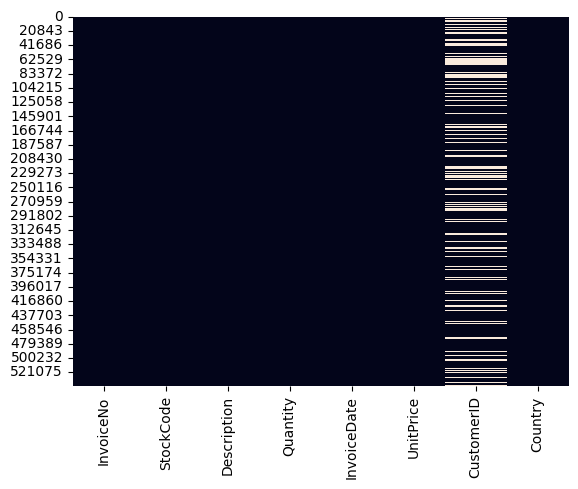

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df = data.copy()

In [ ]:
# Remove rows with negative Quantity
df = df[df['Quantity'] > 0]

# Remove rows with negative UnitPrice
df = df[df['UnitPrice'] > 0]

# Remove rows with null CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove rows with null Description
df.dropna(subset=['Description'], inplace=True)

print("Dataset after cleaning:")
display(df.head())
print(f'\nShape of the dataset after cleaning: {df.shape}')
print(f'\nMissing values after cleaning:\n{df.isnull().sum()}')

Dataset after cleaning:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom



Shape of the dataset after cleaning: (397884, 8)

Missing values after cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

print(f'Number of duplicate rows after removal: {df.duplicated().sum()}')

Number of duplicate rows after removal: 0


In [ ]:
df.nunique().sort_values()

,0
Country,37
Quantity,301
UnitPrice,440
StockCode,3665
Description,3877
CustomerID,4338
InvoiceDate,17282
InvoiceNo,18532


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Convert 'CustomerID' to string
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
# Display the data types after conversion
print("Data types after converting 'CustomerID':")
display(df.info())

Data types after converting 'CustomerID':
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


None

### What all manipulations have you done and insights you found?

Answer Here.

However, in the specific case of customer clustering and the CustomerID column, filling the missing values with a space or any other placeholder wouldn't be appropriate or beneficial.

Here's why:

Clustering requires meaningful identifiers: Clustering algorithms group data points based on their similarities. CustomerID is a unique identifier that distinguishes one customer from another. If you fill missing CustomerID values with a space or a single placeholder, you would essentially be treating all those rows as belonging to the same customer, which is incorrect and would heavily distort your clustering results. You wouldn't be able to differentiate between the customers with missing IDs.
No meaningful way to impute: Unlike some other columns where you might impute missing values based on averages, modes, or other data points, there's no logical or data-driven way to accurately guess or create a meaningful CustomerID for a missing entry. Each customer ID is unique and assigned at the time of a transaction.
Impact on clustering: The goal of customer clustering is to segment customers based on their purchasing behavior. Transactions without a CustomerID cannot be attributed to a specific customer, making them unusable for this type of analysis. Including them with a placeholder would only introduce noise and inaccurate groupings.
While dropping data should be avoided when possible, in this instance, the missing CustomerID values represent transactions from unidentified customers. For the purpose of customer clustering, these transactions don't provide information about specific customer behavior and therefore cannot be included in the analysis. Dropping them ensures that your clustering is performed only on data that is relevant to identifying distinct customer segments.

Think of it this way: if you were trying to group students based on their grades, you couldn't include exam papers without a student's name on them, even if there were many such papers. They simply don't contribute to understanding individual student performance.

So, while dropping data isn't ideal in general, it's the most appropriate and necessary step for the CustomerID column in this customer clustering project.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Plotting to check UnitPrice

<Axes: xlabel='UnitPrice'>

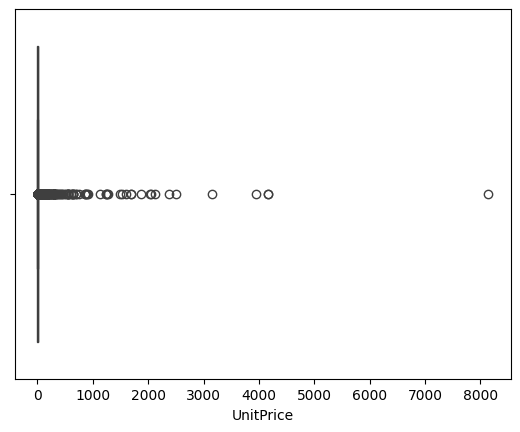

In [ ]:
# Chart - 1 visualization code
sns.boxplot(x=df['UnitPrice'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 UnitPrice And Country

Text(0, 0.5, 'UnitPrice')

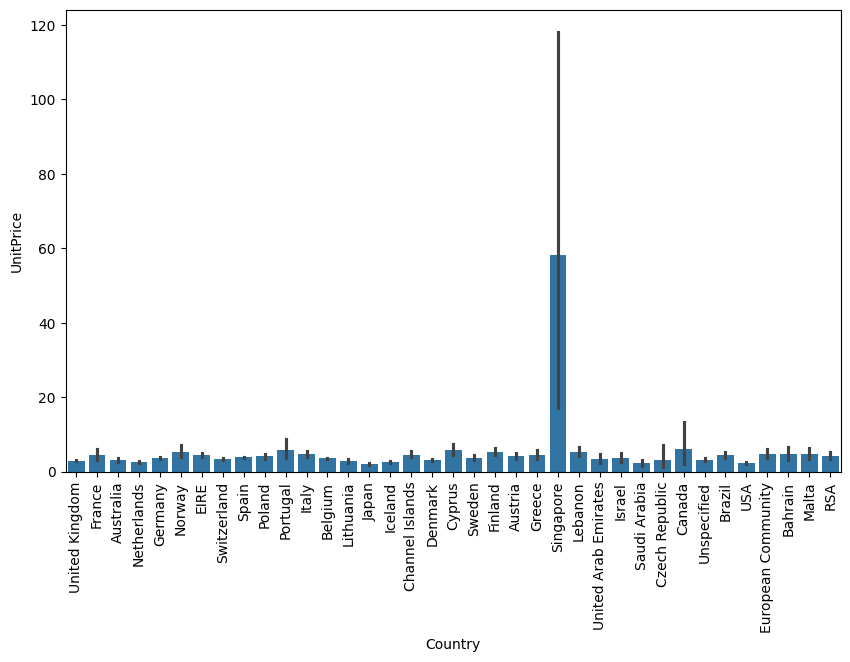

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='UnitPrice', data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('UnitPrice')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Quantity Disrtibution

<Axes: xlabel='Quantity'>

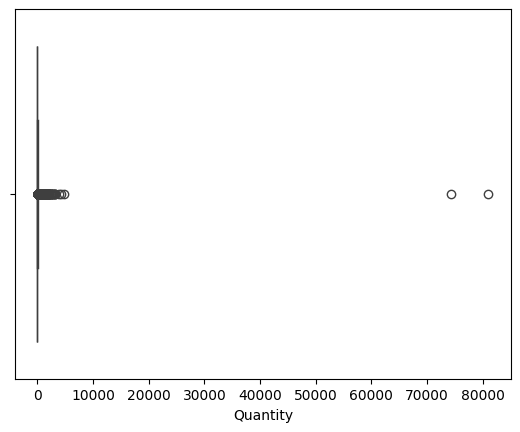

In [ ]:
sns.boxplot(x=df['Quantity'])

In [ ]:
# Chart - 3 visualization code
import plotly.express as px
fig = px.histogram(df, x="Quantity", nbins=20, title="Distribution of Quantity Sold")
fig.update_layout(
    xaxis_title="Quantity",
    yaxis_title="Count",
    bargap=0.1
)
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Quantity v/s Country

Text(0, 0.5, 'Quantity')

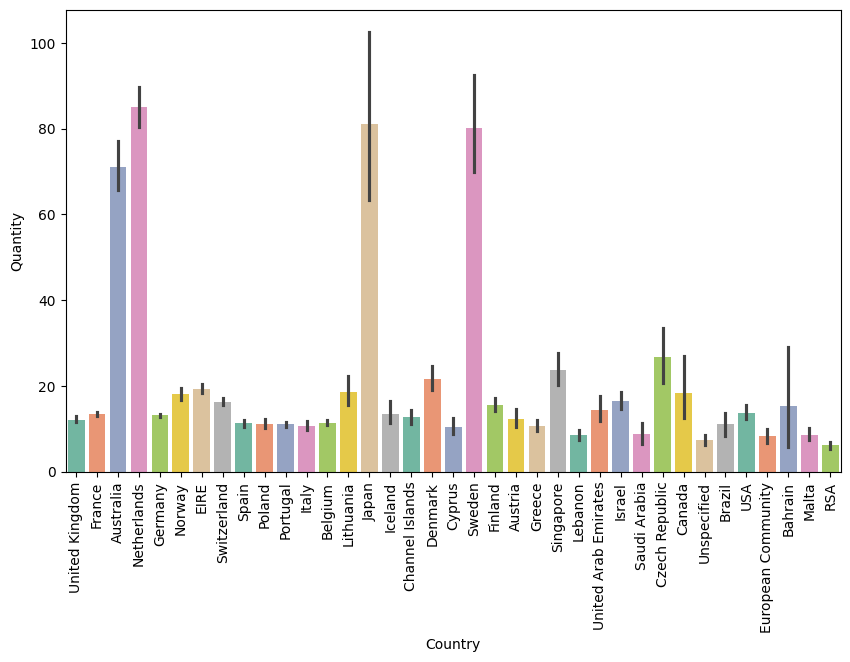

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Quantity', palette= 'Set2',data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Quantity')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 active cust

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

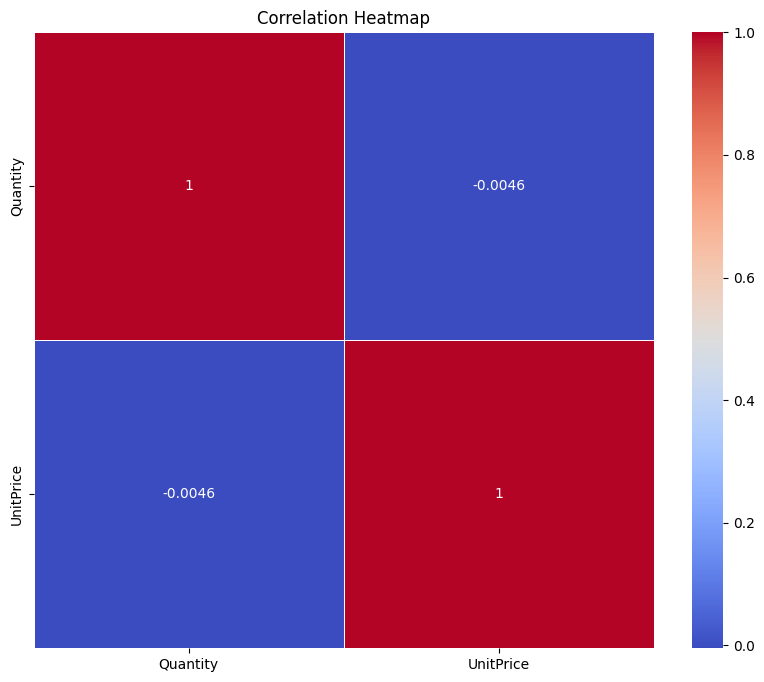

In [ ]:
# Correlation Heatmap visualization code
numerical_df = df.select_dtypes(include=['number']) # Select only numerical columns
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# # Pair Plot visualization code
# numerical_cols = ['Quantity', 'UnitPrice']
# sns.pairplot(df[numerical_cols])
# plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Add a title
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Calculate IQR for Quantity
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

# Calculate IQR for UnitPrice
Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice
lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

# Capping the outliers instead of removing rows
df['Quantity'] = df['Quantity'].clip(lower=lower_bound_quantity, upper=upper_bound_quantity)
df['UnitPrice'] = df['UnitPrice'].clip(lower=lower_bound_unitprice, upper=upper_bound_unitprice)

# Print shape (should remain unchanged)
print(f"Shape of data after capping outliers: {df.shape}")

Shape of data after capping outliers: (392692, 8)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# # Encode your categorical columns

# # One-hot encode the 'Country' column if it will be used as a feature for clustering
# # This is needed because clustering algorithms typically work with numerical data.
# country_dummies = pd.get_dummies(df_cleaned['Country'], prefix='Country')

# # You can then decide whether to merge these dummies back into your main DataFrame
# # if you plan to use 'Country' as a feature for clustering.
# # df_cleaned = pd.concat([df_cleaned, country_dummies], axis=1)

# print("One-hot encoded 'Country' column (example):")
# display(country_dummies.head())

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Creating a new col Amount(Monetary)
df['Amount'] = df['Quantity'] * df['UnitPrice']
a = df.groupby('CustomerID')['Amount'].sum().reset_index()
a.columns = ['CustomerID', 'Total_Amount']
print(a)

     CustomerID  Total_Amount
0       12346.0         28.08
1       12347.0       3877.44
2       12348.0        557.57
3       12349.0       1336.65
4       12350.0        301.90
...         ...           ...
4333    18280.0        174.50
4334    18281.0         61.92
4335    18282.0        150.96
4336    18283.0       2032.63
4337    18287.0       1520.23

[4338 rows x 2 columns]


In [ ]:
# For Frequency

b = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
b.columns = ['CustomerID', 'Frequency']
print(b)

     CustomerID  Frequency
0       12346.0          1
1       12347.0        182
2       12348.0         31
3       12349.0         73
4       12350.0         17
...         ...        ...
4333    18280.0         10
4334    18281.0          7
4335    18282.0         12
4336    18283.0        721
4337    18287.0         70

[4338 rows x 2 columns]


In [ ]:
# Finding the recency

max_date = max(df['InvoiceDate'])
df['Difference'] = max_date - df['InvoiceDate']
c = df.groupby('CustomerID')['Difference'].min().reset_index()
c.columns = ['CustomerID', 'Difference']
c['Difference'] = c['Difference'].dt.days
print(c)

     CustomerID  Difference
0       12346.0         325
1       12347.0           1
2       12348.0          74
3       12349.0          18
4       12350.0         309
...         ...         ...
4333    18280.0         277
4334    18281.0         180
4335    18282.0           7
4336    18283.0           3
4337    18287.0          42

[4338 rows x 2 columns]


In [ ]:
print(df['Country'].value_counts())

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [ ]:
# #Encode your categorical columns

# # One-hot encode the 'Country' column if it will be used as a feature for clustering
# # This is needed because clustering algorithms typically work with numerical data.
# country_dummies = pd.get_dummies(df_cleaned['Country'], prefix='Country')

# # You can then decide whether to merge these dummies back into your main DataFrame
# # if you plan to use 'Country' as a feature for clustering.
# # df_cleaned = pd.concat([df_cleaned, country_dummies], axis=1)

# print("One-hot encoded 'Country' column (example):")
# display(country_dummies.head())

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
df_final = pd.merge(a, b, on='CustomerID', how='inner')
df_final = pd.merge(df_final, c, on='CustomerID', how='inner')
print(df_final.head())

  CustomerID  Total_Amount  Frequency  Difference
0    12346.0         28.08          1         325
1    12347.0       3877.44        182           1
2    12348.0        557.57         31          74
3    12349.0       1336.65         73          18
4    12350.0        301.90         17         309


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
print(df_final.shape)

(4338, 4)


In [ ]:
#scaling
x = df_final[['Total_Amount', 'Frequency', 'Difference']]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled = pd.DataFrame(x_scaled, columns=['Total_Amount', 'Frequency', 'Difference'])
x_scaled.head()

,Total_Amount,Frequency,Difference
0,0.000214,0.000000,0.871314
1,0.034094,0.023583,0.002681
2,0.004874,0.003909,0.198391
3,0.011732,0.009381,0.048257
4,0.002624,0.002085,0.828418


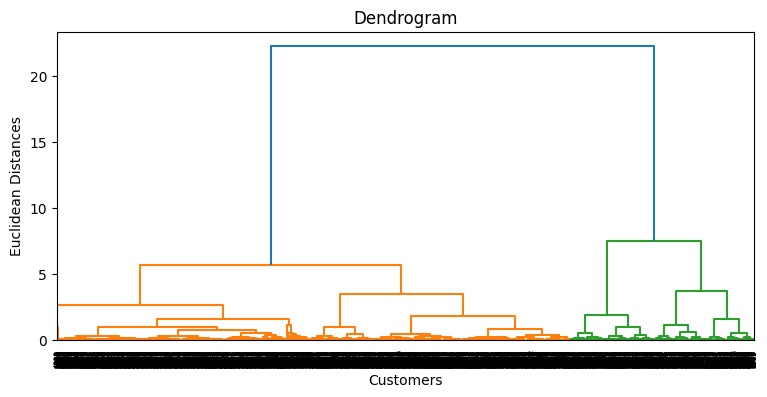

In [ ]:
plt.figure(figsize = (9, 4))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method = 'ward'))#sch.dendrogram plots , sch.linkage to create links and method ward defines how the linkage will be created.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

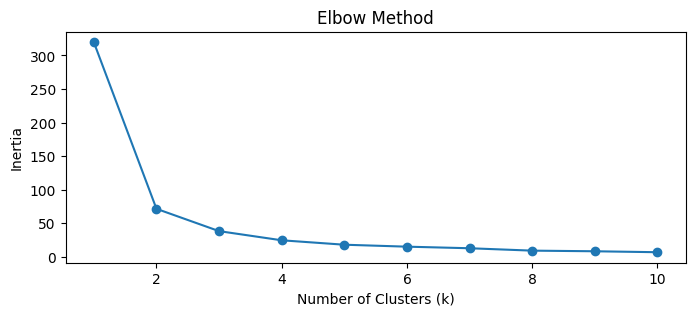

In [ ]:
#using the Elbow Method with KMeans clustering to find the optimal number of clusters k.

k_range = range(1, 11)
# preparing a list to store inertia values — which tell us how well the data is grouped for each number of clusters.
inertia_values = []

for k in k_range:
    model = KMeans(n_clusters = k)#train
    model.fit(x_scaled)#fit
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)

for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(x_scaled)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg:.4f}")


For n_clusters=2, the silhouette score is 0.7255
For n_clusters=3, the silhouette score is 0.6498
For n_clusters=4, the silhouette score is 0.5712
For n_clusters=5, the silhouette score is 0.5550
For n_clusters=6, the silhouette score is 0.5349
For n_clusters=7, the silhouette score is 0.5158
For n_clusters=8, the silhouette score is 0.4930
For n_clusters=9, the silhouette score is 0.4968
For n_clusters=10, the silhouette score is 0.4911


In [ ]:
# # model creation
# kmeans = KMeans(n_clusters = 3, max_iter=50)
# kmeans.fit_predict(x_scaled)
# lbs = kmeans.labels_
# print(lbs)

In [ ]:
# df_final['Clust ID'] = lbs
# df_final.head()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,linkage = 'ward')# It is a bottom up clus. method.
y_hc = hc.fit_predict(x_scaled)#train # y_hc is a array of label showing which data will group to which clust.

In [ ]:
y_hc

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
df_final['aglo_label'] = y_hc
df_final.head()

,CustomerID,Total_Amount,Frequency,Difference,aglo_label
0,12346.0,28.08,1,325,1
1,12347.0,3877.44,182,1,0
2,12348.0,557.57,31,74,0
3,12349.0,1336.65,73,18,0
4,12350.0,301.90,17,309,1


In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x_scaled)

In [ ]:
df_final['kmeans_label'] = y_kmeans
df_final.head()

,CustomerID,Total_Amount,Frequency,Difference,aglo_label,kmeans_label
0,12346.0,28.08,1,325,1,0
1,12347.0,3877.44,182,1,0,1
2,12348.0,557.57,31,74,0,1
3,12349.0,1336.65,73,18,0,1
4,12350.0,301.90,17,309,1,0


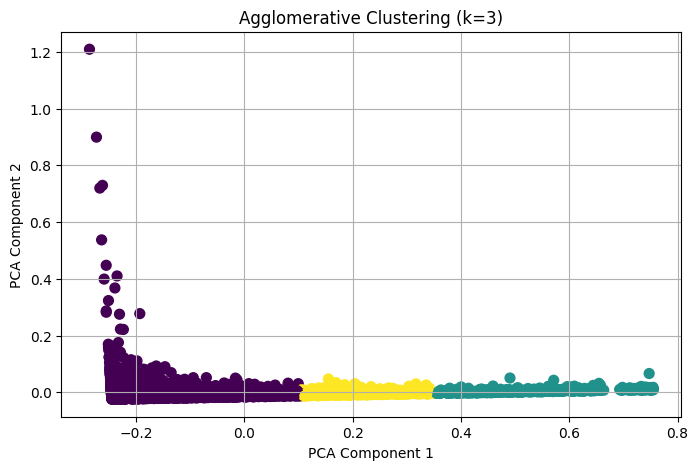

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(x_scaled)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_agg, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


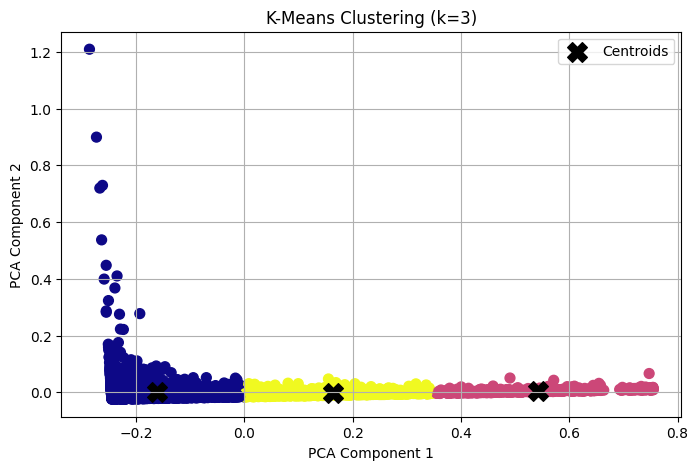

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(x_scaled)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_kmeans, cmap='plasma', s=50)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],
    pca.transform(kmeans.cluster_centers_)[:, 1],
    c='black', marker='X', s=200, label='Centroids'
)
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
print("KMeans Silhouette:", silhouette_score(x_scaled, labels_kmeans))
print("Agglomerative Silhouette:", silhouette_score(x_scaled, labels_agg))

KMeans Silhouette: 0.6498472178946655
Agglomerative Silhouette: 0.636891881963292


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import pandas as pd
import numpy as np

# Features and Target
X = df_final[['Total_Amount', 'Frequency', 'Difference']]  # raw features
y = df_final['kmeans_label']  # cluster column as target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only after splitting to prevent leakage
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       172

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

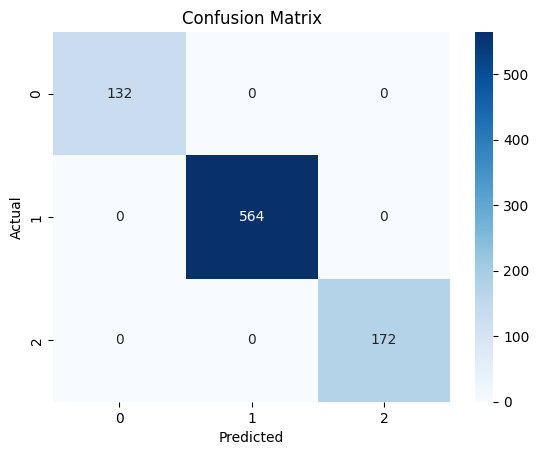

In [ ]:
# Visualizing evaluation Metric Score chart
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


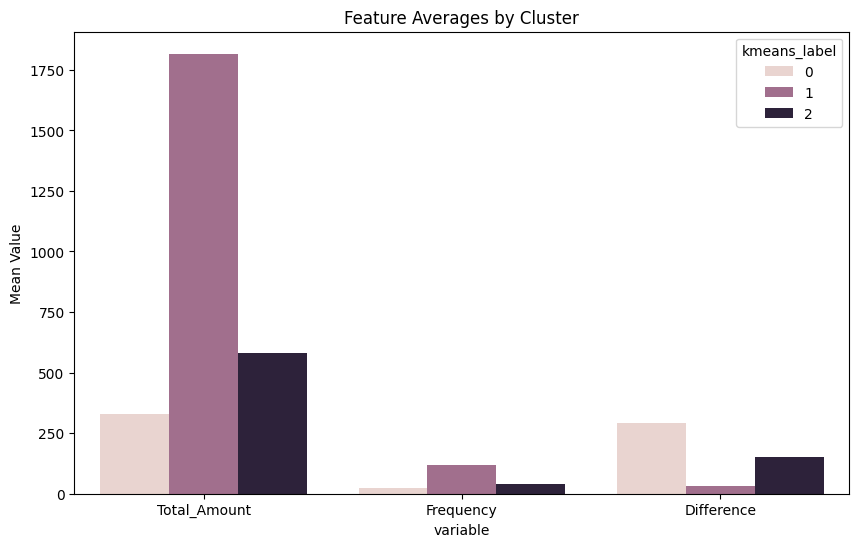

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt for seaborn barplot
melted = df_final.melt(id_vars='kmeans_label', value_vars=['Total_Amount', 'Frequency', 'Difference'])
plt.figure(figsize=(10,6))
sns.barplot(x='variable', y='value', hue='kmeans_label', data=melted, ci=None)
plt.title('Feature Averages by Cluster')
plt.ylabel('Mean Value')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Feature and Target Selection
X = df_final[['Total_Amount', 'Frequency', 'Difference']]  # Input features
y = df_final['kmeans_label']  # Target labels from KMeans clustering

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features (MinMaxScaler)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Decision Tree Classifier (no n_estimators here)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       564
           2       1.00      1.00      1.00       172

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

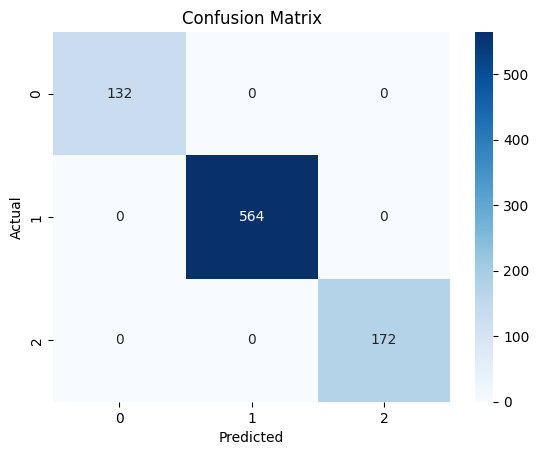

In [ ]:
# Visualizing evaluation Metric Score chart
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***